# 1. Import and Install Dependencies

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
len(results.pose_landmarks.landmark)

33

In [8]:
results

mediapipe.python.solution_base.SolutionOutputs

In [9]:
draw_landmarks(frame, results)

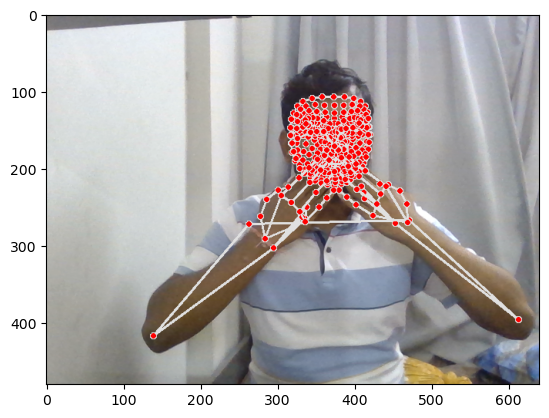

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [11]:
len(results.face_landmarks.landmark)

468

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [15]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [16]:
result_test = extract_keypoints(results)

In [17]:
result_test

array([ 0.58512545,  0.35698512, -0.78248125, ...,  0.58284938,
        0.4767592 , -0.03930117])

In [18]:
np.save('0', result_test)

In [19]:
np.load('0.npy')

array([ 0.58512545,  0.35698512, -0.78248125, ...,  0.58284938,
        0.4767592 , -0.03930117])

# 4. Setup Folders for Collection

In [20]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [21]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [22]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [23]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.6, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(200)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [25]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [24]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [25]:
label_map = {label:num for num, label in enumerate(actions)}

In [26]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [27]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [28]:
np.array(sequences).shape

(90, 30, 1662)

In [29]:
np.array(labels).shape

(90,)

In [30]:
X = np.array(sequences)

In [31]:
X.shape

(90, 30, 1662)

In [32]:
y = to_categorical(labels).astype(int)

In [33]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [35]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [37]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [38]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [41]:
res = [.7, 0.2, 0.1]

In [42]:
actions[np.argmax(res)]

'hello'

In [39]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [40]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 3s 286ms/step - loss: 19.4392 - categorical_accuracy: 0.3176
Epoch 2/2000
3/3 [==============================] - 0s 64ms/step - loss: 9.8745 - categorical_accuracy: 0.4118
Epoch 3/2000
3/3 [==============================] - 0s 70ms/step - loss: 24.2211 - categorical_accuracy: 0.3294
Epoch 4/2000
3/3 [==============================] - 0s 72ms/step - loss: 19.7570 - categorical_accuracy: 0.3882
Epoch 5/2000
3/3 [==============================] - 0s 63ms/step - loss: 25.9640 - categorical_accuracy: 0.2824
Epoch 6/2000
3/3 [==============================] - 0s 85ms/step - loss: 14.9146 - categorical_accuracy: 0.4235
Epoch 7/2000
3/3 [==============================] - 0s 64ms/step - loss: 7.8557 - categorical_accuracy: 0.4000
Epoch 8/2000
3/3 [==============================] - 0s 73ms/step - loss: 6.8264 - categorical_accuracy: 0.3176
Epoch 9/2000
3/3 [==============================] - 0s 67ms/step - loss: 5.9822 - categorical_accuracy: 0.

3/3 [==============================] - 0s 72ms/step - loss: 3.9343 - categorical_accuracy: 0.4118
Epoch 74/2000
3/3 [==============================] - 0s 67ms/step - loss: 3.6170 - categorical_accuracy: 0.3647
Epoch 75/2000
3/3 [==============================] - 0s 69ms/step - loss: 4.9578 - categorical_accuracy: 0.2941
Epoch 76/2000
3/3 [==============================] - 0s 69ms/step - loss: 2.6397 - categorical_accuracy: 0.3412
Epoch 77/2000
3/3 [==============================] - 0s 72ms/step - loss: 3.0016 - categorical_accuracy: 0.4118
Epoch 78/2000
3/3 [==============================] - 0s 66ms/step - loss: 2.5958 - categorical_accuracy: 0.3765
Epoch 79/2000
3/3 [==============================] - 0s 70ms/step - loss: 2.2375 - categorical_accuracy: 0.3412
Epoch 80/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.9072 - categorical_accuracy: 0.4000
Epoch 81/2000
3/3 [==============================] - 0s 71ms/step - loss: 2.3265 - categorical_accuracy: 0.2941
Epoch 

3/3 [==============================] - 0s 67ms/step - loss: 1.4602 - categorical_accuracy: 0.4000
Epoch 146/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.7833 - categorical_accuracy: 0.2941
Epoch 147/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.3554 - categorical_accuracy: 0.4588
Epoch 148/2000
3/3 [==============================] - 0s 68ms/step - loss: 2.0753 - categorical_accuracy: 0.4353
Epoch 149/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.8939 - categorical_accuracy: 0.4000
Epoch 150/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.3485 - categorical_accuracy: 0.4706
Epoch 151/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.6992 - categorical_accuracy: 0.3882
Epoch 152/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.7784 - categorical_accuracy: 0.5059
Epoch 153/2000
3/3 [==============================] - 0s 65ms/step - loss: 2.5818 - categorical_accuracy: 0.352

3/3 [==============================] - 0s 73ms/step - loss: 1.2779 - categorical_accuracy: 0.5412
Epoch 218/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.2367 - categorical_accuracy: 0.5412
Epoch 219/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.3884 - categorical_accuracy: 0.4235
Epoch 220/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.0267 - categorical_accuracy: 0.4235
Epoch 221/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.0357 - categorical_accuracy: 0.4353
Epoch 222/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.9969 - categorical_accuracy: 0.4353
Epoch 223/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.0909 - categorical_accuracy: 0.5882
Epoch 224/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.4222 - categorical_accuracy: 0.3294
Epoch 225/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.2351 - categorical_accuracy: 0.447

3/3 [==============================] - 0s 66ms/step - loss: 1.1657 - categorical_accuracy: 0.4824
Epoch 290/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.0187 - categorical_accuracy: 0.4235
Epoch 291/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.9034 - categorical_accuracy: 0.6000
Epoch 292/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0848 - categorical_accuracy: 0.4824
Epoch 293/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.9611 - categorical_accuracy: 0.6471
Epoch 294/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.6833 - categorical_accuracy: 0.7412
Epoch 295/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.7037 - categorical_accuracy: 0.7176
Epoch 296/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.2856 - categorical_accuracy: 0.6353
Epoch 297/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0422 - categorical_accuracy: 0.505

3/3 [==============================] - 0s 66ms/step - loss: 0.6153 - categorical_accuracy: 0.7176
Epoch 362/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.6001 - categorical_accuracy: 0.6471
Epoch 363/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.6041 - categorical_accuracy: 0.7412
Epoch 364/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.6513 - categorical_accuracy: 0.6824
Epoch 365/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.7083 - categorical_accuracy: 0.6471
Epoch 366/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.7172 - categorical_accuracy: 0.6353
Epoch 367/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.6556 - categorical_accuracy: 0.7294
Epoch 368/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.5223 - categorical_accuracy: 0.6000
Epoch 369/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.9927 - categorical_accuracy: 0.729

3/3 [==============================] - 0s 63ms/step - loss: 1.4849 - categorical_accuracy: 0.6824
Epoch 434/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.8887 - categorical_accuracy: 0.6941
Epoch 435/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.8729 - categorical_accuracy: 0.6706
Epoch 436/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.9934 - categorical_accuracy: 0.6941
Epoch 437/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.1361 - categorical_accuracy: 0.6353
Epoch 438/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.2353 - categorical_accuracy: 0.6471
Epoch 439/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.8729 - categorical_accuracy: 0.5529
Epoch 440/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.8070 - categorical_accuracy: 0.6353
Epoch 441/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.8135 - categorical_accuracy: 0.564

3/3 [==============================] - 0s 71ms/step - loss: 0.6318 - categorical_accuracy: 0.7529
Epoch 506/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.7632 - categorical_accuracy: 0.6941
Epoch 507/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.6496 - categorical_accuracy: 0.7176
Epoch 508/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.5828 - categorical_accuracy: 0.7176
Epoch 509/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.5381 - categorical_accuracy: 0.7529
Epoch 510/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.4704 - categorical_accuracy: 0.8471
Epoch 511/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.4994 - categorical_accuracy: 0.7647
Epoch 512/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.5185 - categorical_accuracy: 0.7294
Epoch 513/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.4938 - categorical_accuracy: 0.882

3/3 [==============================] - 0s 69ms/step - loss: 0.6306 - categorical_accuracy: 0.6824
Epoch 578/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.7551 - categorical_accuracy: 0.6941
Epoch 579/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.7591 - categorical_accuracy: 0.7059
Epoch 580/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0355 - categorical_accuracy: 0.6471
Epoch 581/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.6199 - categorical_accuracy: 0.6706
Epoch 582/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.7426 - categorical_accuracy: 0.6824
Epoch 583/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.5901 - categorical_accuracy: 0.7529
Epoch 584/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.8811 - categorical_accuracy: 0.6941
Epoch 585/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.8117 - categorical_accuracy: 0.705

3/3 [==============================] - 0s 68ms/step - loss: 1.2743 - categorical_accuracy: 0.6353
Epoch 650/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.6154 - categorical_accuracy: 0.7059
Epoch 651/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.6729 - categorical_accuracy: 0.7412
Epoch 652/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.9965 - categorical_accuracy: 0.6706
Epoch 653/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.1638 - categorical_accuracy: 0.6471
Epoch 654/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.8101 - categorical_accuracy: 0.7412
Epoch 655/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.9055 - categorical_accuracy: 0.6588
Epoch 656/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.7140 - categorical_accuracy: 0.7059
Epoch 657/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.7560 - categorical_accuracy: 0.576

3/3 [==============================] - 0s 71ms/step - loss: 0.5210 - categorical_accuracy: 0.7765
Epoch 722/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.4872 - categorical_accuracy: 0.8353
Epoch 723/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.5988 - categorical_accuracy: 0.6471
Epoch 724/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.5699 - categorical_accuracy: 0.7176
Epoch 725/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.7236 - categorical_accuracy: 0.6941
Epoch 726/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.5178 - categorical_accuracy: 0.7647
Epoch 727/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.4168 - categorical_accuracy: 0.7765
Epoch 728/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.4949 - categorical_accuracy: 0.7882
Epoch 729/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.5181 - categorical_accuracy: 0.823

3/3 [==============================] - 0s 79ms/step - loss: 1.0069 - categorical_accuracy: 0.7059
Epoch 794/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.0248 - categorical_accuracy: 0.7412
Epoch 795/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.0437 - categorical_accuracy: 0.6706
Epoch 796/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.4935 - categorical_accuracy: 0.7882
Epoch 797/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.6944 - categorical_accuracy: 0.7412
Epoch 798/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.4400 - categorical_accuracy: 0.8235
Epoch 799/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.3968 - categorical_accuracy: 0.8353
Epoch 800/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.7332 - categorical_accuracy: 0.7412
Epoch 801/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.2547 - categorical_accuracy: 0.63

3/3 [==============================] - 0s 69ms/step - loss: 0.8919 - categorical_accuracy: 0.6824
Epoch 866/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.6554 - categorical_accuracy: 0.7647
Epoch 867/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.5054 - categorical_accuracy: 0.7882
Epoch 868/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.4824 - categorical_accuracy: 0.7882
Epoch 869/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.5267 - categorical_accuracy: 0.7412
Epoch 870/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.4599 - categorical_accuracy: 0.8000
Epoch 871/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.5027 - categorical_accuracy: 0.8000
Epoch 872/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.4618 - categorical_accuracy: 0.8235
Epoch 873/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.4725 - categorical_accuracy: 0.729

3/3 [==============================] - 0s 76ms/step - loss: 0.7050 - categorical_accuracy: 0.7529
Epoch 938/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.5828 - categorical_accuracy: 0.7176
Epoch 939/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.4134 - categorical_accuracy: 0.8235
Epoch 940/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.4013 - categorical_accuracy: 0.8235
Epoch 941/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.3594 - categorical_accuracy: 0.8588
Epoch 942/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.4403 - categorical_accuracy: 0.7882
Epoch 943/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.6962 - categorical_accuracy: 0.6588
Epoch 944/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.4750 - categorical_accuracy: 0.7529
Epoch 945/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.5522 - categorical_accuracy: 0.717

3/3 [==============================] - 0s 67ms/step - loss: 0.9624 - categorical_accuracy: 0.7529
Epoch 1010/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.8633 - categorical_accuracy: 0.7176
Epoch 1011/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.9204 - categorical_accuracy: 0.7529
Epoch 1012/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.6730 - categorical_accuracy: 0.7412
Epoch 1013/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.9632 - categorical_accuracy: 0.7176
Epoch 1014/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.6343 - categorical_accuracy: 0.7059
Epoch 1015/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.4239 - categorical_accuracy: 0.7647
Epoch 1016/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.7465 - categorical_accuracy: 0.6941
Epoch 1017/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.4997 - categorical_accurac

3/3 [==============================] - 0s 70ms/step - loss: 1.3870 - categorical_accuracy: 0.6824
Epoch 1082/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.9980 - categorical_accuracy: 0.7294
Epoch 1083/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.9254 - categorical_accuracy: 0.6824
Epoch 1084/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.9089 - categorical_accuracy: 0.7647
Epoch 1085/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.5961 - categorical_accuracy: 0.7529
Epoch 1086/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.5554 - categorical_accuracy: 0.7176
Epoch 1087/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.5217 - categorical_accuracy: 0.7529
Epoch 1088/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.5801 - categorical_accuracy: 0.7647
Epoch 1089/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.7767 - categorical_accurac

3/3 [==============================] - 0s 65ms/step - loss: 0.4460 - categorical_accuracy: 0.7882
Epoch 1154/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.6159 - categorical_accuracy: 0.7529
Epoch 1155/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.4424 - categorical_accuracy: 0.7529
Epoch 1156/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.4925 - categorical_accuracy: 0.7882
Epoch 1157/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.3907 - categorical_accuracy: 0.7882
Epoch 1158/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.4448 - categorical_accuracy: 0.7765
Epoch 1159/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.6511 - categorical_accuracy: 0.7059
Epoch 1160/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.5781 - categorical_accuracy: 0.7647
Epoch 1161/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.5337 - categorical_accurac

3/3 [==============================] - 0s 67ms/step - loss: 1.0223 - categorical_accuracy: 0.6941
Epoch 1226/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.7353 - categorical_accuracy: 0.7176
Epoch 1227/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.4676 - categorical_accuracy: 0.7765
Epoch 1228/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.6030 - categorical_accuracy: 0.7412
Epoch 1229/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.7599 - categorical_accuracy: 0.7412
Epoch 1230/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.3819 - categorical_accuracy: 0.7882
Epoch 1231/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.3368 - categorical_accuracy: 0.8235
Epoch 1232/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.3403 - categorical_accuracy: 0.8000
Epoch 1233/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.3971 - categorical_accurac

3/3 [==============================] - 0s 67ms/step - loss: 0.2248 - categorical_accuracy: 0.8706
Epoch 1298/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.2317 - categorical_accuracy: 0.8588
Epoch 1299/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.1719 - categorical_accuracy: 1.0000
Epoch 1300/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.1902 - categorical_accuracy: 0.9647
Epoch 1301/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.1700 - categorical_accuracy: 0.9765
Epoch 1302/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.1390 - categorical_accuracy: 0.9882
Epoch 1303/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.2050 - categorical_accuracy: 0.9059
Epoch 1304/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.1668 - categorical_accuracy: 0.9176
Epoch 1305/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.1430 - categorical_accurac

3/3 [==============================] - 0s 67ms/step - loss: 0.0413 - categorical_accuracy: 0.9882
Epoch 1370/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.0270 - categorical_accuracy: 1.0000
Epoch 1371/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.0390 - categorical_accuracy: 1.0000
Epoch 1372/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.0509 - categorical_accuracy: 0.9882
Epoch 1373/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.0674 - categorical_accuracy: 0.9882
Epoch 1374/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.2046 - categorical_accuracy: 0.8824
Epoch 1375/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.2644 - categorical_accuracy: 0.8706
Epoch 1376/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.2896 - categorical_accuracy: 0.8706
Epoch 1377/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.7208 - categorical_accurac

3/3 [==============================] - 0s 67ms/step - loss: 0.0110 - categorical_accuracy: 1.0000
Epoch 1442/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.0107 - categorical_accuracy: 1.0000
Epoch 1443/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.0107 - categorical_accuracy: 1.0000
Epoch 1444/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.0109 - categorical_accuracy: 1.0000
Epoch 1445/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.0107 - categorical_accuracy: 1.0000
Epoch 1446/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.0102 - categorical_accuracy: 1.0000
Epoch 1447/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.0106 - categorical_accuracy: 1.0000
Epoch 1448/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.0103 - categorical_accuracy: 1.0000
Epoch 1449/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.0097 - categorical_accurac

3/3 [==============================] - 0s 72ms/step - loss: 0.0064 - categorical_accuracy: 1.0000
Epoch 1514/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.0062 - categorical_accuracy: 1.0000
Epoch 1515/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.0061 - categorical_accuracy: 1.0000
Epoch 1516/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.0061 - categorical_accuracy: 1.0000
Epoch 1517/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.0062 - categorical_accuracy: 1.0000
Epoch 1518/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.0061 - categorical_accuracy: 1.0000
Epoch 1519/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.0063 - categorical_accuracy: 1.0000
Epoch 1520/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.0059 - categorical_accuracy: 1.0000
Epoch 1521/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.0059 - categorical_accurac

3/3 [==============================] - 0s 64ms/step - loss: 0.0040 - categorical_accuracy: 1.0000
Epoch 1586/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.0039 - categorical_accuracy: 1.0000
Epoch 1587/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.0039 - categorical_accuracy: 1.0000
Epoch 1588/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.0039 - categorical_accuracy: 1.0000
Epoch 1589/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.0039 - categorical_accuracy: 1.0000
Epoch 1590/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.0039 - categorical_accuracy: 1.0000
Epoch 1591/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.0038 - categorical_accuracy: 1.0000
Epoch 1592/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.0039 - categorical_accuracy: 1.0000
Epoch 1593/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.0039 - categorical_accurac

3/3 [==============================] - 0s 68ms/step - loss: 0.0027 - categorical_accuracy: 1.0000
Epoch 1658/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.0027 - categorical_accuracy: 1.0000
Epoch 1659/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.0027 - categorical_accuracy: 1.0000
Epoch 1660/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.0027 - categorical_accuracy: 1.0000
Epoch 1661/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.0027 - categorical_accuracy: 1.0000
Epoch 1662/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.0026 - categorical_accuracy: 1.0000
Epoch 1663/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.0027 - categorical_accuracy: 1.0000
Epoch 1664/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.0026 - categorical_accuracy: 1.0000
Epoch 1665/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.0026 - categorical_accurac

Epoch 1729/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.0020 - categorical_accuracy: 1.0000
Epoch 1730/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0020 - categorical_accuracy: 1.0000
Epoch 1731/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.0020 - categorical_accuracy: 1.0000
Epoch 1732/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.0019 - categorical_accuracy: 1.0000
Epoch 1733/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.0019 - categorical_accuracy: 1.0000
Epoch 1734/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.0019 - categorical_accuracy: 1.0000
Epoch 1735/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0019 - categorical_accuracy: 1.0000
Epoch 1736/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.0019 - categorical_accuracy: 1.0000
Epoch 1737/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.0019 - cat

3/3 [==============================] - 0s 76ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 1801/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 1802/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 1803/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 1804/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 1805/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 1806/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 1807/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 1808/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.0014 - categorical_accurac

3/3 [==============================] - 0s 69ms/step - loss: 9.1889e-04 - categorical_accuracy: 1.0000
Epoch 1872/2000
3/3 [==============================] - 0s 68ms/step - loss: 9.0582e-04 - categorical_accuracy: 1.0000
Epoch 1873/2000
3/3 [==============================] - 0s 67ms/step - loss: 8.9773e-04 - categorical_accuracy: 1.0000
Epoch 1874/2000
3/3 [==============================] - 0s 60ms/step - loss: 8.8686e-04 - categorical_accuracy: 1.0000
Epoch 1875/2000
3/3 [==============================] - 0s 69ms/step - loss: 8.7682e-04 - categorical_accuracy: 1.0000
Epoch 1876/2000
3/3 [==============================] - 0s 67ms/step - loss: 8.7636e-04 - categorical_accuracy: 1.0000
Epoch 1877/2000
3/3 [==============================] - 0s 73ms/step - loss: 8.5869e-04 - categorical_accuracy: 1.0000
Epoch 1878/2000
3/3 [==============================] - 0s 78ms/step - loss: 8.6642e-04 - categorical_accuracy: 1.0000
Epoch 1879/2000
3/3 [==============================] - 0s 76ms/step - lo

3/3 [==============================] - 0s 72ms/step - loss: 5.6269e-04 - categorical_accuracy: 1.0000
Epoch 1941/2000
3/3 [==============================] - 0s 70ms/step - loss: 5.6801e-04 - categorical_accuracy: 1.0000
Epoch 1942/2000
3/3 [==============================] - 0s 71ms/step - loss: 5.6193e-04 - categorical_accuracy: 1.0000
Epoch 1943/2000
3/3 [==============================] - 0s 66ms/step - loss: 5.4942e-04 - categorical_accuracy: 1.0000
Epoch 1944/2000
3/3 [==============================] - 0s 64ms/step - loss: 5.4859e-04 - categorical_accuracy: 1.0000
Epoch 1945/2000
3/3 [==============================] - 0s 74ms/step - loss: 5.4679e-04 - categorical_accuracy: 1.0000
Epoch 1946/2000
3/3 [==============================] - 0s 63ms/step - loss: 5.4728e-04 - categorical_accuracy: 1.0000
Epoch 1947/2000
3/3 [==============================] - 0s 75ms/step - loss: 5.4132e-04 - categorical_accuracy: 1.0000
Epoch 1948/2000
3/3 [==============================] - 0s 68ms/step - lo

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

# 8. Make Predictions

In [42]:
res = model.predict(X_test)

In [43]:
actions[np.argmax(res[4])]

'thanks'

In [44]:
actions[np.argmax(y_test[4])]

'thanks'

# 9. Save Weights

In [45]:
model.save('action.h5')

In [46]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [47]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [48]:
yhat = model.predict(X_test)

In [49]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [50]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [0, 3]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [51]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [67]:
from scipy import stats

In [68]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

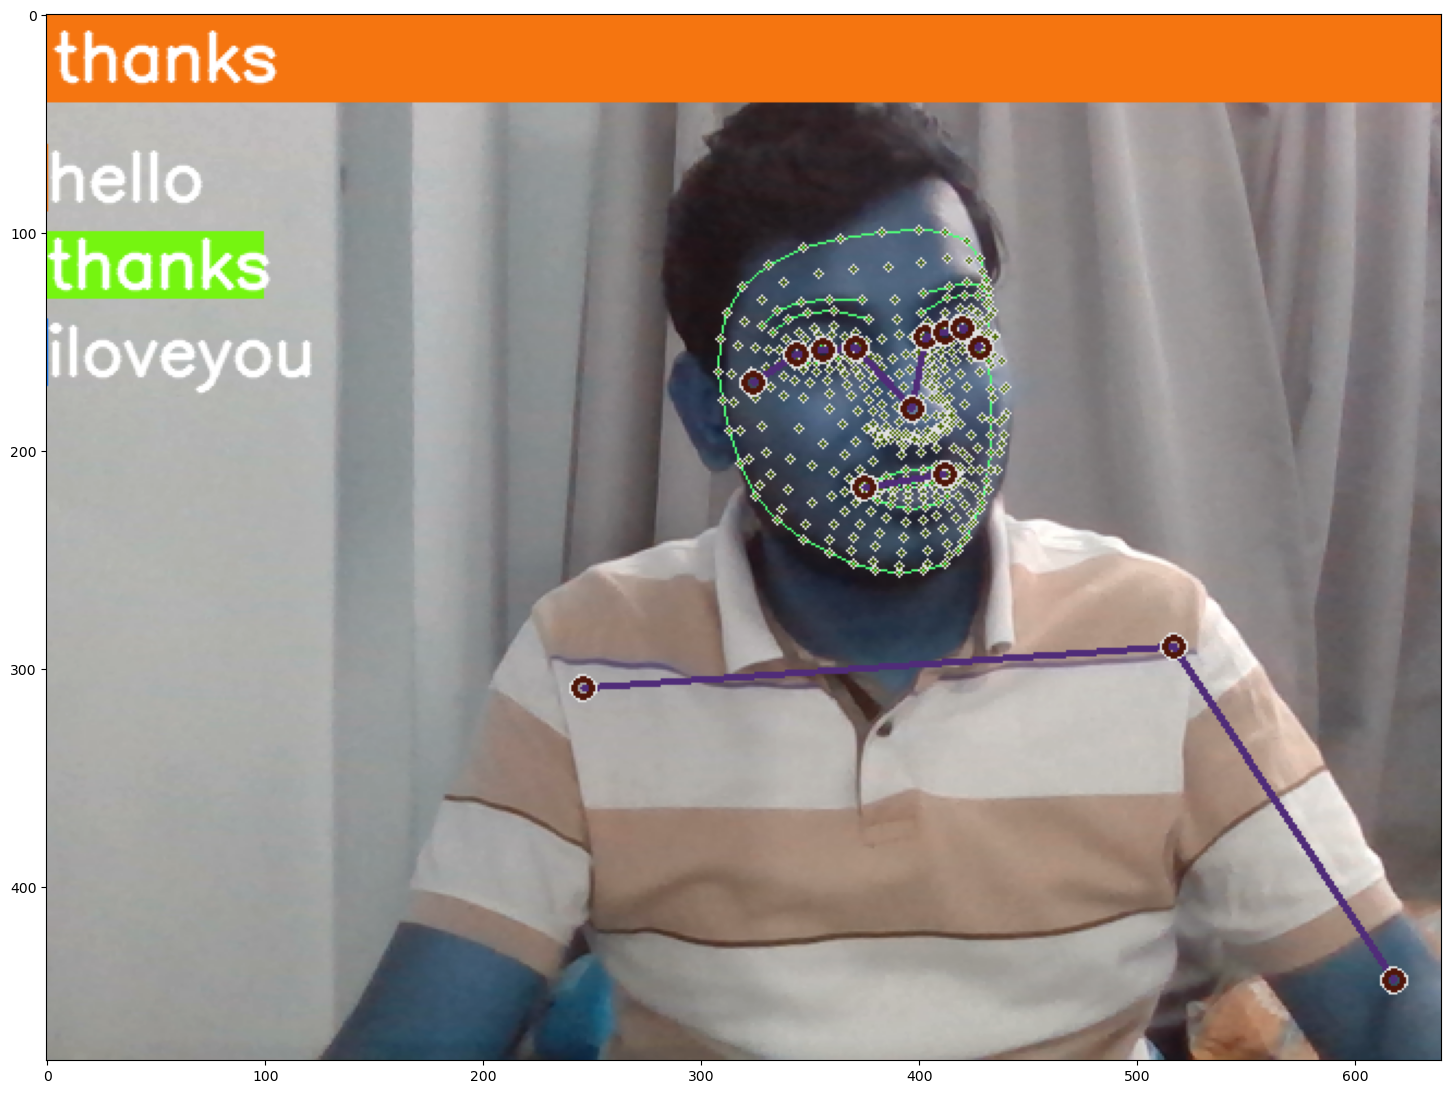

In [69]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [70]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
       
        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
        
            #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 1: 
                sentence = sentence[-1:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.pyt